In [16]:
import pandas as pd
import numpy as np
df = pd.read_csv("Water_Temp_Strain.txt",sep='\t',header=None)
df.rename(columns={0: 'W_Level_m'}, inplace=True)
df.rename(columns={1: 'Temp_c'}, inplace=True)
df.rename(columns={2: 'micro_strain'}, inplace=True)

#add time component to data frame
delta_t = 144 #min 
t_st = 0
t_fi = delta_t*(len(df)-1)
time_array = np.linspace(t_st, t_fi, len(df), endpoint=True)
df.insert (0, "t_minute", time_array)
df

,t_minute,W_Level_m,Temp_c,micro_strain
0,0.0,-7.317645,0.372449,16.774547
1,144.0,-7.232018,-0.754370,19.498479
2,288.0,-6.477226,1.109975,49.871754
3,432.0,-7.146589,1.569678,28.395637
4,576.0,-7.253274,4.265809,10.035322
...,...,...,...,...
3646,525024.0,-7.860808,0.752731,-0.671496
3647,525168.0,-7.803942,-1.444742,-1.995406
3648,525312.0,-7.721651,-1.365997,-21.020292
3649,525456.0,-8.085533,1.090953,-6.944226


In [17]:
#form a matrix y
y = df['micro_strain'].to_numpy()
#y = np.transpose(y)
#form a matrix A
df["1"]=1
A = df[["t_minute","1","Temp_c","W_Level_m"]].to_numpy()
#A = np.transpose(A)
print("This is y")
print(y)
print("This is A")
print(A)


This is y
[ 16.77454715  19.49847855  49.87175411 ... -21.02029241  -6.94422611
   4.80705458]
This is A
[[ 0.00000000e+00  1.00000000e+00  3.72449496e-01 -7.31764510e+00]
 [ 1.44000000e+02  1.00000000e+00 -7.54370183e-01 -7.23201755e+00]
 [ 2.88000000e+02  1.00000000e+00  1.10997522e+00 -6.47722629e+00]
 ...
 [ 5.25312000e+05  1.00000000e+00 -1.36599656e+00 -7.72165131e+00]
 [ 5.25456000e+05  1.00000000e+00  1.09095295e+00 -8.08553348e+00]
 [ 5.25600000e+05  1.00000000e+00  4.21902384e+00 -7.66052752e+00]]


In [18]:
#form a A_transpose
A_transpose = np.transpose(A)
print("This is A_transpose")
print(A_transpose)
#form a A_plus
A_plus = np.matmul(np.linalg.inv(np.matmul(A_transpose,A)),A_transpose)
w_hat = np.matmul(A_plus,y)
print("This is w_hat")
print(w_hat)


This is A_transpose
[[ 0.00000000e+00  1.44000000e+02  2.88000000e+02 ...  5.25312000e+05
   5.25456000e+05  5.25600000e+05]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 3.72449496e-01 -7.54370183e-01  1.10997522e+00 ... -1.36599656e+00
   1.09095295e+00  4.21902384e+00]
 [-7.31764510e+00 -7.23201755e+00 -6.47722629e+00 ... -7.72165131e+00
  -8.08553348e+00 -7.66052752e+00]]
This is w_hat
[-4.29842638e-04 -4.39502381e+02  1.44327434e+00 -5.31572336e+01]


In [19]:
alph = w_hat[0]
beta = w_hat[1]
gamm = w_hat[2]
delt = w_hat[3]

In [20]:
def q_t(time):
    q = alph*time+beta
    return q
q_t(3000)

-440.79190912183117

In [21]:
def min_from_year(y):
    minute = y*365*24*60
    return minute
q_t(min_from_year(5))

-1569.1288341221095

In [22]:
#residual
r = y - np.matmul(A,w_hat)
df['r']=r
print(r)

[ 66.75361104  75.71747367 143.58450021 ... 235.79346946 227.04241163
 256.93306619]


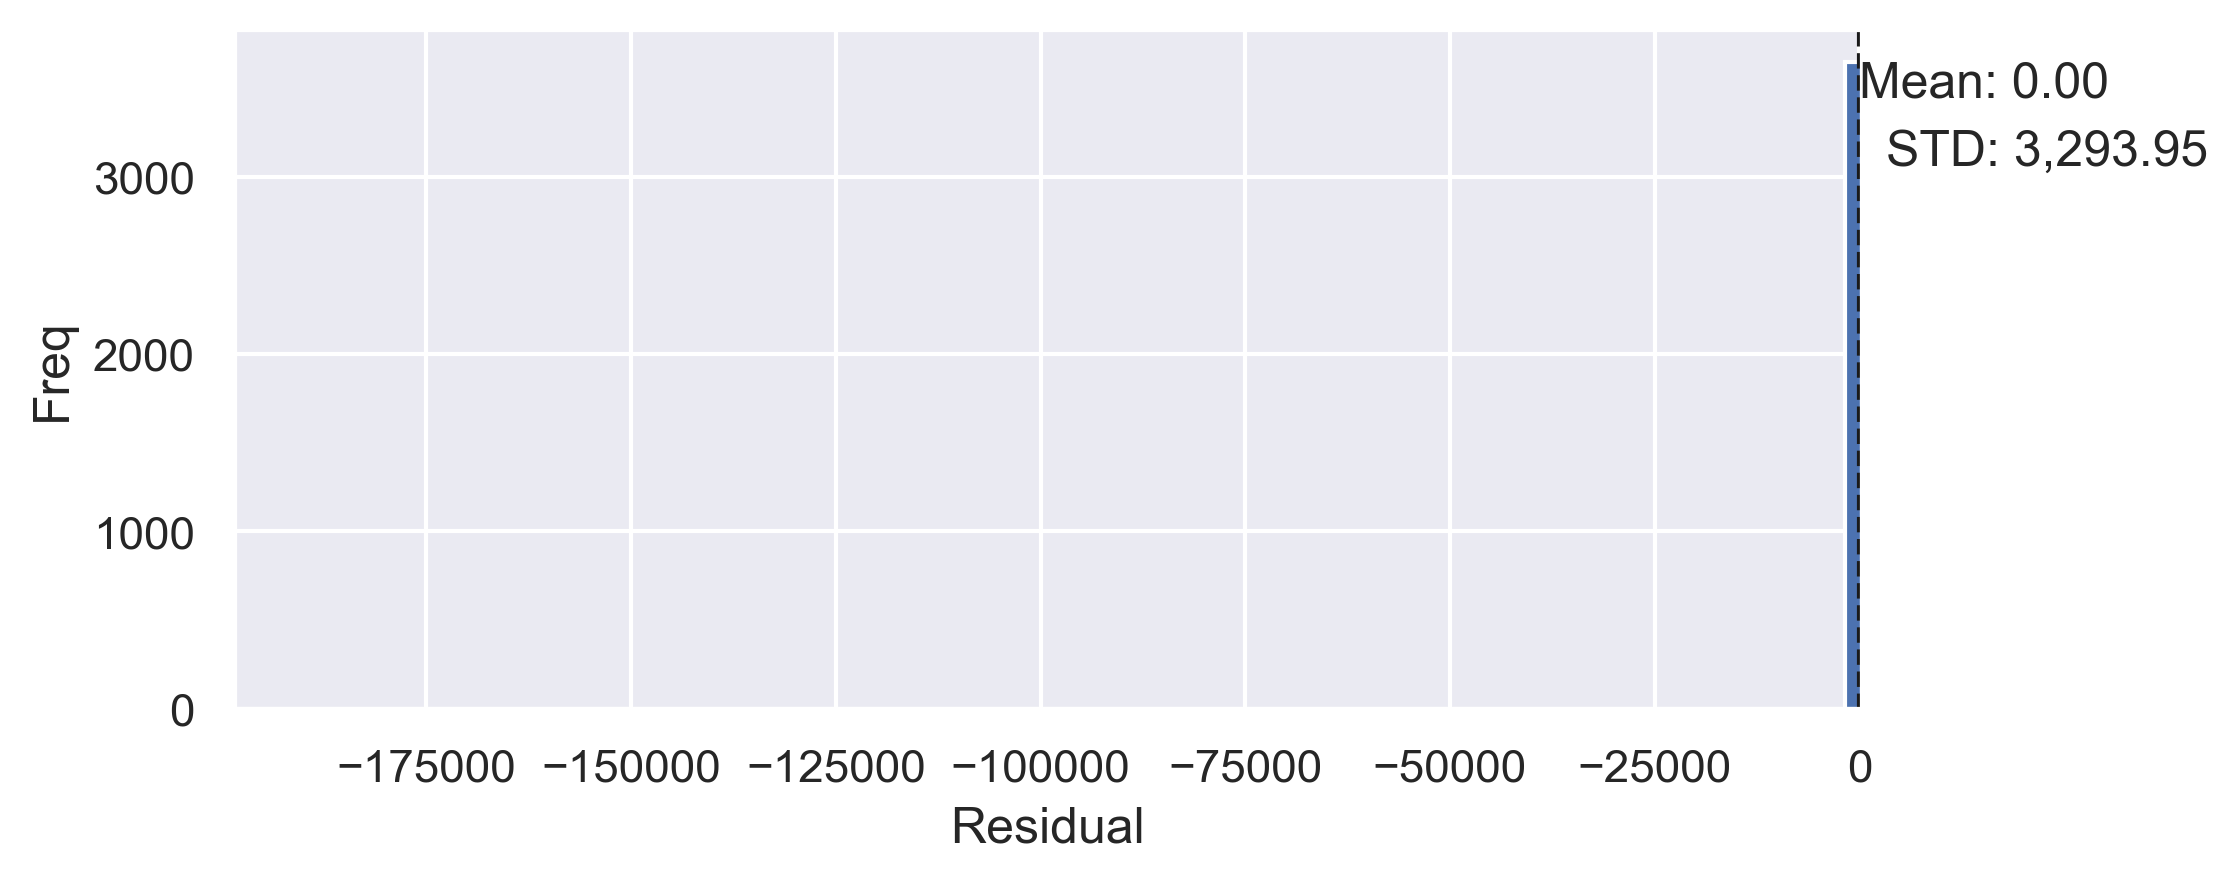

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib.ticker import (MultipleLocator,FormatStrFormatter,AutoMinorLocator)

sns.set()

fig, ax = plt.subplots(figsize=[7,3],dpi=300)
ax.set_xlim([df['r'].min(),df['r'].max()])

_ = plt.hist(df['r'], bins =100)
_ = plt.xlabel('Residual')
_ = plt.ylabel('Freq')

ze,max_y = plt.ylim()

plt.axvline(df['r'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['r'].mean(),max_y*0.9, 'Mean: {0:,.2f}'.format(df['r'].mean()))

plt.axvline(df['r'].std(), color='k', linestyle='dashed', linewidth=1)
plt.text(df['r'].std(),max_y*0.8, 'STD: {0:,.2f}'.format(df['r'].std()))

#plt.axvline(df['r'].quantile(0.95), color='k', linestyle='dashed', linewidth=1)
#plt.text(df['r'].quantile(0.95),max_y*0.8, 'The 95th: ${0:,.2f}'.format(df['r'].quantile(0.95)))
#
#plt.axvline(df['r'].quantile(0.05), color='k', linestyle='dashed', linewidth=1)
#plt.text(df['r'].quantile(0.05),max_y*0.8, 'The 5th: ${0:,.2f}'.format(df['r'].quantile(0.05)))

plt.savefig('Residual_plot.png')
plt.show()

In [33]:
df['r'].describe()

count    3.651000e+03
mean     3.606467e-13
std      3.293953e+03
min     -1.984707e+05
25%     -1.037732e+01
50%      3.347926e+01
75%      1.171414e+02
max      2.863694e+02
Name: r, dtype: float64

In [42]:
df.head(10).style.format('{0:,.2f}')

,t_minute,W_Level_m,Temp_c,micro_strain,1,r
0,0.00,-7.32,0.37,16.77,1.00,66.75
1,144.00,-7.23,-0.75,19.50,1.00,75.72
2,288.00,-6.48,1.11,49.87,1.00,143.58
3,432.00,-7.15,1.57,28.40,1.00,85.93
4,576.00,-7.25,4.27,10.04,1.00,58.06
5,720.00,-7.44,-1.34,5.51,1.00,51.91
6,864.00,-6.63,-3.53,-8.19,1.00,84.12
7,"1,008.00",-7.17,-1.89,18.84,1.00,80.28
8,"1,152.00",-6.87,-1.36,4.11,1.00,80.91
9,"1,296.00",-6.76,-1.21,20.30,1.00,102.52
